In [104]:
import pandas as pd
import datetime as dt
from datetime import timedelta
from datetime import datetime
from numpy import random
from numpy import nan
import plotly.express as px


glob_random_state=100
random.seed(glob_random_state)
year=str('2019')

show_intermediate_results = True #True 

n_verkoop_order_df = 158 #random.randint(150,400)

In [105]:
dataframes_list = ['klant_df', 'verkoop_order_df', 'product_df', 'werkorder_df', 'machine_df',
                   'woonplaatsen_df', 'achternamen_df', 'onderdelen_df', 'BOM_df', 'route_df']

In [106]:
def create_dataframes(dataframes_list):
    for df in dataframes_list:
        vars()[df] = pd.DataFrame()

In [107]:
klant_df = pd.DataFrame(random.randint(0,100,size=(25, 4)),  \
                        columns=['klant_id','klant_naam','klant_achternaam','klant_woonplaats'])
klant_df.index.rename('klant_id', inplace=True)


if show_intermediate_results == True:

    print(klant_df.head(10))

          klant_id  klant_naam  klant_achternaam  klant_woonplaats
klant_id                                                          
0                8          24                67                87
1               79          48                10                94
2               52          98                53                66
3               98          14                34                24
4               15          60                58                16
5                9          93                86                 2
6               27           4                31                 1
7               13          83                 4                91
8               59          67                 7                49
9               47          65                61                14


In [108]:
import xml.etree.ElementTree as et 

xtree = et.parse("fn_10kw.xml")
xroot = xtree.getroot()

df_columns=['achternaam', 'achternaam_los', 'voorvoegsel']
rows=[]

for node in xroot:
#     record = node.attrib.get("record")
#     naam = node.find("naam")  #.text if node is not None else None

    naam = ''
    achternaam_los = node.getchildren()[2].text if node is not None else None
    prefix = node.getchildren()[1].text if node is not None else None
    if prefix is not None:
        naam = achternaam_los+', '+prefix
    else: naam = achternaam_los
    
    rows.append({'achternaam':naam, 'achternaam_los':achternaam_los, 'voorvoegsel':prefix})

achternamen_df = pd.DataFrame(rows, columns=df_columns)
achternamen_df = achternamen_df.sample(len(klant_df))
achternamen_df.reset_index(inplace=True)
achternamen_df.index=klant_df['klant_achternaam']


voornamen_df = pd.read_csv('voornamen.txt', sep=';', skiprows=0, encoding='latin-1')
voornamen_df.columns=['geslacht','meet_jaar','maand','voornaam', 'rang']
voornamen_df = voornamen_df.sample(len(klant_df))
voornamen_df.reset_index(inplace=True)
voornamen_df.index=klant_df['klant_naam']


klant_df=klant_df.join(achternamen_df['achternaam'], on='klant_achternaam')
klant_df=klant_df.join(voornamen_df[['voornaam','geslacht']], on='klant_naam')
klant_df.drop(columns=['klant_achternaam','klant_naam'], inplace=True)
klant_df.drop_duplicates(subset=['klant_id','klant_woonplaats'], keep='first', inplace=True)

del voornamen_df, achternamen_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning:

This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning:

This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.



In [109]:
woonplaatsen_df = pd.read_csv('Woonplaatsen_in_Nederland_2018_07042020_210926.csv', sep='";"', skiprows=3)

woonplaatsen_df = woonplaatsen_df[1:]
new_column_names = list(woonplaatsen_df.columns)
new_column_names[0]='Woonplaats'
woonplaatsen_df.columns = new_column_names

# Take small sample of woonplaatsen_df and create new (incorrect) indexes (based on klant_df)
woonplaatsen_df=woonplaatsen_df.sample(len(klant_df))
woonplaatsen_df.reset_index(inplace=True)
woonplaatsen_df.index=klant_df['klant_woonplaats']

woonplaatsen_df['Woonplaats'] = woonplaatsen_df['Woonplaats'].apply(lambda x: str(x).replace('"', '') )



if show_intermediate_results == True:
    
    print(woonplaatsen_df.head(10) )

                  index      Woonplaats Gemeente|Naam  Gemeente|Code   \
klant_woonplaats                                                        
87                  192  Bergen op Zoom   BergenopZoom         GM0748   
94                 1993         Stokkum    Montferland         GM1955   
66                 1982        Stegeren          Ommen         GM0175   
24                  785       Heemstede      Heemstede         GM0397   
16                  891      Hoensbroek        Heerlen         GM0917   
2                  1770    Rinsumageast    Dantumadiel         GM1891   
1                   890      Hoenderloo            Ede         GM0228   
91                   83           Annen      AaenHunze         GM1680   
49                  196   Bergschenhoek  Lansingerland         GM1621   
14                  563      Everdingen         Vianen         GM0620   

                 Provincie|Naam Provincie|Code   Landsdeel|Naam  \
klant_woonplaats                                        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [110]:
klant_df=klant_df.join(woonplaatsen_df[['Woonplaats', 'Gemeente|Naam ', 'Gemeente|Code ', 'Provincie|Naam']],\
              on='klant_woonplaats')
klant_df.drop(columns=['klant_woonplaats'], inplace=True)
klant_df=klant_df[~klant_df.duplicated(subset=['klant_id','achternaam'], keep='first')]
del woonplaatsen_df
klant_df

,klant_id,achternaam,voornaam,geslacht,Woonplaats,Gemeente|Naam,Gemeente|Code,Provincie|Naam
klant_id,,,,,,,,
0,8,"Luijn, van",Noëlle,V,Bergen op Zoom,BergenopZoom,GM0748,Noord-Brabant
1,79,Oldenhuis,Feline,V,Stokkum,Montferland,GM1955,Gelderland
2,52,Li,Levi,M,Stegeren,Ommen,GM0175,Overijssel
3,98,"Avest, ter",Willem,M,Heemstede,Heemstede,GM0397,Noord-Holland
4,15,Selhorst,Nynke,V,Hoensbroek,Heerlen,GM0917,Limburg
5,9,Westers,Lara,V,Rinsumageast,Dantumadiel,GM1891,Friesland
6,27,Mourik,Stefan,M,Hoenderloo,Ede,GM0228,Gelderland
7,13,"Kesteren, van",Jeroen,M,Annen,AaenHunze,GM1680,Drenthe
8,59,Gomes,Job,M,Bergschenhoek,Lansingerland,GM1621,Zuid-Holland


In [111]:
# import modules
#import random
import datetime

# create function accepting a single parameter, the year as a four digit number
def get_random_date(year):
    
    calendar=pd.bdate_range(start='01-01-'+year, end='31-12-'+year)
    random_day=random.randint(0, 261)
    
    # try to get a date
    try:
#        return datetime.datetime.strptime('{} {}'.format(random.randint(1, 366), year), '%j %Y')
        return datetime.datetime.strptime(calendar[random_day].strftime('%Y-%m-%d') ,'%Y-%m-%d')

    # if the value happens to be in the leap year range, try again
    except ValueError:
        get_random_date(year)

In [112]:
verkoop_order_df = pd.DataFrame(data=(random.randint(0,25, size=(n_verkoop_order_df, 2))), columns=['klant_id','verkoop_order_datum'])
verkoop_order_df['verkoop_order_datum'] = verkoop_order_df['verkoop_order_datum'].apply(lambda x: get_random_date(year))
verkoop_order_df.sort_values(by='verkoop_order_datum', inplace=True)
verkoop_order_df.reset_index(drop=True, inplace=True)
verkoop_order_df.index.rename('verkoop_order_id', inplace=True)


if show_intermediate_results == True:
    print('n_verkoop_order_df : {}\n'.format(n_verkoop_order_df))
    print(verkoop_order_df.head(10))

n_verkoop_order_df : 158

                  klant_id verkoop_order_datum
verkoop_order_id                              
0                        1          2019-01-02
1                       14          2019-01-03
2                       11          2019-01-04
3                       14          2019-01-09
4                        1          2019-01-09
5                        1          2019-01-10
6                       13          2019-01-11
7                       20          2019-01-11
8                        9          2019-01-15
9                        2          2019-01-17


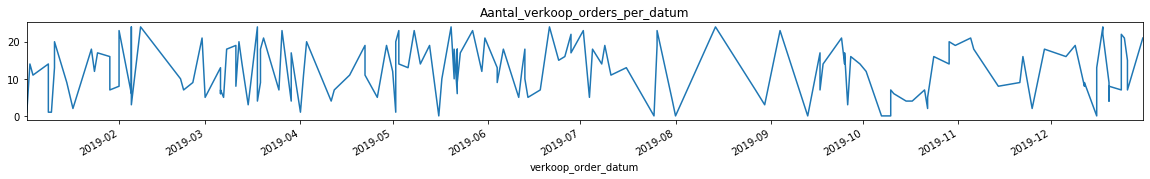

In [113]:
if show_intermediate_results == True:
    verkoop_order_df.plot(x='verkoop_order_datum', figsize=(20,2), legend=False, title='Aantal_verkoop_orders_per_datum', kind='line')

In [114]:
if show_intermediate_results == True:
#    verkoop_order_df.hist(column='klant_id', bins=10)
    fig=px.histogram(verkoop_order_df, x='verkoop_order_datum', nbins=12)
    fig.show()

In [115]:
if show_intermediate_results == True:
#    verkoop_order_df.hist(column='klant_id', bins=10)
    fig=px.histogram(verkoop_order_df, x='klant_id', nbins=10)
    fig.show()

In [117]:
product_verkoop_prijs_S, product_verkoop_prijs_M, product_verkoop_prijs_L = random.randint(50, 80, size=(3,1))
ratio_kp = 0.6

product_data={                                             # Adding new product_id, requires to add bewerkingstijd() and BOM
 0:{'name':'Robot arm (S)',
    'revisie':'A',
    'kostprijs':product_verkoop_prijs_S,
     'verkoopprijs':product_verkoop_prijs_S*ratio_kp},
 1:{'name':'Robot arm (M)',
    'revisie':'A',
    'kostprijs':product_verkoop_prijs_M,
     'verkoopprijs':product_verkoop_prijs_M*ratio_kp},
 2:{'name':'Robot arm (L)',
    'revisie':'A',
    'kostprijs':product_verkoop_prijs_L,
     'verkoopprijs':product_verkoop_prijs_L*ratio_kp},
 4:{'name':'Robot arm (L)',                                 # 'product_id' without a bill of material, for example purpose
    'revisie':'B',
    'kostprijs':product_verkoop_prijs_L,
     'verkoopprijs':product_verkoop_prijs_L*ratio_kp+17},
 3:{'name':'Robot arm (S)',
    'revisie':'B',
    'kostprijs':product_verkoop_prijs_S,
     'verkoopprijs':product_verkoop_prijs_S*ratio_kp+5}
}


product_df = pd.DataFrame.from_dict(product_data, orient='index').reset_index()
product_df.columns = ['product_id','product_naam','revisie','product_verkoop_prijs','product_kost_prijs']


product_df.index.rename('product_id', inplace=True)


if show_intermediate_results == True:
    
    print(product_df.head(10) )

            product_id   product_naam revisie product_verkoop_prijs  \
product_id                                                            
0                    0  Robot arm (S)       A                  [71]   
1                    1  Robot arm (M)       A                  [61]   
2                    2  Robot arm (L)       A                  [52]   
3                    4  Robot arm (L)       B                  [52]   
4                    3  Robot arm (S)       B                  [71]   

           product_kost_prijs  
product_id                     
0                      [42.6]  
1                      [36.6]  
2                      [31.2]  
3                      [48.2]  
4                      [47.6]  


In [118]:
# Opnieuw vullen van 'product_id' met de nieuwe id zoals ze gecreeerd zijn in product_df
verkoop_order_df['product_id'] = verkoop_order_df['verkoop_order_datum'].apply(\
                                                        lambda x: random.randint(0,len(product_df)))

In [119]:
def onderdelen():
    onderdeel_type=pd.DataFrame.from_dict({0:"Ruw Materiaal",\
                                           1:"Mechanisch",\
                                           2:"Electrisch"},\
                                         orient='index',\
                                         columns=['onderdeel_type_beschrijving'])
    onderdeel_type.index.rename('onderdeel_type_id', inplace=True)
    
    onderdelen=pd.DataFrame()
    columns=['onderdeel_id','onderdeel_naam','onderdeel_kostprijs','onderdeel_type']
    data= [[0,"Bout",0.002,1],
           [1,"Moer",0.002,1], 
           [2,"Schakelaar",3.075,2], 
           [3,"Sensor, controle",9.651,2], 
           [4,"Afdek kap plastic",1.003,0], 
           [5,"Staal frame",16.432,0],
           [6,"Afdek kap recylced plastic",6.103,0], 
          ]
    onderdelen=pd.DataFrame(data=data, columns=columns)
    
    onderdelen=onderdelen.join(onderdeel_type, on='onderdeel_type')
    onderdelen.drop(columns=['onderdeel_type'], inplace=True)
    
    return onderdelen

if show_intermediate_results == True:
    print(onderdelen())

   onderdeel_id              onderdeel_naam  onderdeel_kostprijs  \
0             0                        Bout                0.002   
1             1                        Moer                0.002   
2             2                  Schakelaar                3.075   
3             3            Sensor, controle                9.651   
4             4           Afdek kap plastic                1.003   
5             5                 Staal frame               16.432   
6             6  Afdek kap recylced plastic                6.103   

  onderdeel_type_beschrijving  
0                  Mechanisch  
1                  Mechanisch  
2                  Electrisch  
3                  Electrisch  
4               Ruw Materiaal  
5               Ruw Materiaal  
6               Ruw Materiaal  


In [120]:
onderdelen_df=onderdelen()
onderdelen_df

,onderdeel_id,onderdeel_naam,onderdeel_kostprijs,onderdeel_type_beschrijving
0,0,Bout,0.002,Mechanisch
1,1,Moer,0.002,Mechanisch
2,2,Schakelaar,3.075,Electrisch
3,3,"Sensor, controle",9.651,Electrisch
4,4,Afdek kap plastic,1.003,Ruw Materiaal
5,5,Staal frame,16.432,Ruw Materiaal
6,6,Afdek kap recylced plastic,6.103,Ruw Materiaal


In [121]:
def bill_of_materials(product_df):
    BOM=pd.DataFrame()
    columns=['product_id','product_revisie','BOM_lijn','BOM_hoeveelheid','BOM_eenheid','BOM_onderdeel_id_kind']

    data=[[0,'A', 0, 2, 'stuks', 0],
          [0,'A', 1, 2, 'stuks', 1],
          [0,'A', 2, 1, 'stuks', 2],
         # [0,'A', 3, 1, 'stuks', 3],   # Removed with intention 
          [0,'A', 4, 4, 'stuks', 4],
          [0,'A', 5, 1, 'stuks', 5],

          [1,'A', 0, 2, 'stuks', 0],
          [1,'A', 1, 2, 'stuks', 1],
          [1,'A', 2, 1, 'stuks', 2],
          [1,'A', 3, 1, 'stuks', 3],
          [1,'A', 4, 4, 'stuks', 4],
          [1,'A', 5, 1, 'stuks', 5], 
         
          [2,'A', 0, 2, 'stuks', 0],
          [2,'A', 1, 2, 'stuks', 1],
          [2,'A', 2, 1, 'stuks', 2],
          [2,'A', 3, 4, 'stuks', 3],
          [2,'A', 4, 12, 'stuks', 4],
          [2,'A', 5, 2, 'stuks', 5],
         
          [3,'B', 0, 2, 'stuks', 0],  # Updated revision on same product as product_id = 0
          [3,'B', 1, 2, 'stuks', 1],
          [3,'B', 2, 1, 'stuks', 2],
          [3,'B', 3, 1, 'stuks', 3],  # BOM_lijn #3 added     
          [3,'B', 4, 4, 'stuks', 6],  # Replaced with onderdeel #6 Afdek kap recylced plastic
          [3,'B', 5, 1, 'stuks', 5]]
    
    BOM=pd.DataFrame(data=data, columns=columns)
    BOM.index.rename('BOM_id', inplace=True)
    
    # Just create an empty 'BOM_id' if a product_id is given
    products=list(product_df.index)
    for val in products:
        if val not in BOM['product_id'].unique():
            BOM=BOM.append(dict(zip(columns,[val,None,'','',None,''])),ignore_index=True)

#     # Convert ID's from floats to integers
#     BOM=BOM.dropna().select_dtypes(include=['float64']).astype('int16', copy=False)
#     # just don't use np.nan on integer columns to prevent them being converted to float...
    
    return BOM


if show_intermediate_results == True:
    print(bill_of_materials(product_df))

    product_id product_revisie BOM_lijn BOM_hoeveelheid BOM_eenheid  \
0            0               A        0               2       stuks   
1            0               A        1               2       stuks   
2            0               A        2               1       stuks   
3            0               A        4               4       stuks   
4            0               A        5               1       stuks   
5            1               A        0               2       stuks   
6            1               A        1               2       stuks   
7            1               A        2               1       stuks   
8            1               A        3               1       stuks   
9            1               A        4               4       stuks   
10           1               A        5               1       stuks   
11           2               A        0               2       stuks   
12           2               A        1               2       stuks   
13    

In [122]:
BOM_df=bill_of_materials(product_df)

In [123]:
def verkoop_order_product_map(verkoop_order_datum, product_df, year=year): #, glob_random_state=glob_random_state):
    product_df=product_df[['product_id', 'product_naam', 'revisie']]
    
    # find the minimum revision per product_naam
    idx = product_df.groupby(['product_naam'])['revisie'].transform(min) == product_df['revisie']
    prod_df_rev_min=product_df[idx].copy()
    
    # and the max/highest revision
    idx = product_df.groupby(['product_naam'])['revisie'].transform(max) == product_df['revisie']
    prod_df_rev_max=product_df[idx].copy()
    
    if type(verkoop_order_datum) != str:
        if type(verkoop_order_datum) != datetime.datetime:
            verkoop_order_datum = str(datetime.datetime.strptime(verkoop_order_datum.strftime('%Y-%m-%d') ,'%Y-%m-%d'))
    
    if verkoop_order_datum < year+'-08-01':
        verkocht_product_id=prod_df_rev_min.sample(1) #, random_state=glob_random_state)
    else: 
        verkocht_product_id=prod_df_rev_max.sample(1)

   
    return int(verkocht_product_id['product_id'])

if show_intermediate_results == True:
    for verkoop_order_datum in ['2019-01-03','2019-04-03','2019-07-03','2019-08-03','2019-09-03','2019-10-03']:
        prod=verkoop_order_product_map(verkoop_order_datum, product_df, year)
        print(verkoop_order_datum,'\t: ',prod,'\tRev :  ',product_df.iloc[prod]['revisie'],'\n')

2019-01-03 	:  2 	Rev :   A 

2019-04-03 	:  0 	Rev :   A 

2019-07-03 	:  1 	Rev :   A 

2019-08-03 	:  3 	Rev :   B 

2019-09-03 	:  4 	Rev :   B 

2019-10-03 	:  1 	Rev :   A 



In [124]:
verkoop_order_df['verkocht_product_id'] = verkoop_order_df['verkoop_order_datum'].apply(\
                                                        lambda x: verkoop_order_product_map(x,\
                                                                                            product_df, year=year))

verkoop_order_df['verkocht_product_aantal'] = 1

if show_intermediate_results == True:
    print(verkoop_order_df)

                  klant_id verkoop_order_datum  product_id  \
verkoop_order_id                                             
0                        1          2019-01-02           0   
1                       14          2019-01-03           2   
2                       11          2019-01-04           2   
3                       14          2019-01-09           4   
4                        1          2019-01-09           0   
...                    ...                 ...         ...   
153                     22          2019-12-24           0   
154                     21          2019-12-25           4   
155                     15          2019-12-26           3   
156                      7          2019-12-26           1   
157                     21          2019-12-31           1   

                  verkocht_product_id  verkocht_product_aantal  
verkoop_order_id                                                
0                                   1                        1 

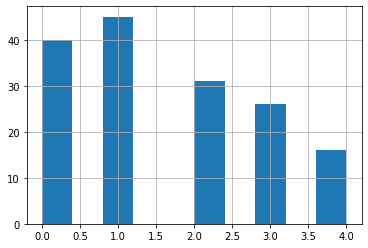

In [143]:
# verkoop_order_df['product_id'] = verkoop_order_df['verkoop_order_datum'].apply(lambda x: random.randint(0,3))


if show_intermediate_results == True:
    verkoop_order_df['verkocht_product_id'].hist()

In [125]:
machine_data ={
    0:{'machine_type':'boor'},
    1:{'machine_type':'frees'},
    2:{'machine_type':'buig'},
    3:{'machine_type':'CNC'},
    4:{'machine_type':'snij'},
    5:{'machine_type':'boor'},
    6:{'machine_type':'stans'},
    7:{'machine_type':'CNC'},
    8:{'machine_type':'snij'},
    9:{'machine_type':'CNC'},
    10:{'machine_type':'CNC'},
    11:{'machine_type':'CNC'},
    12:{'machine_type':'boor'}    
    }
machine_df = pd.DataFrame.from_dict(machine_data, orient='index').reset_index()
machine_df.columns = ['machine_id','machine_type']


machine_df.index.rename('machine_id', inplace=True)


if show_intermediate_results == True:
    
    print(machine_df.head(10) )

            machine_id machine_type
machine_id                         
0                    0         boor
1                    1        frees
2                    2         buig
3                    3          CNC
4                    4         snij
5                    5         boor
6                    6        stans
7                    7          CNC
8                    8         snij
9                    9          CNC


In [126]:
# werkorder_df = pd.DataFrame(data=(random.randint(0,25, size=(n_verkoop_order_df, 2))), columns=['klant_id','verkoop_order_datum'])
werkorder_df = verkoop_order_df.copy()
werkorder_df.reset_index(inplace = True)
werkorder_df.index.rename('werkorder_id', inplace=True)
werkorder_df['werkorder_start_datum'] = werkorder_df['verkoop_order_datum'].apply(lambda x: x+timedelta(days=random.randint(0,2)))
werkorder_df['werkorder_eind_datum'] = werkorder_df['verkoop_order_datum'].apply(lambda x: x+timedelta(days=random.randint(3,10)))


werkorder_df.drop(['klant_id','verkoop_order_datum'], axis=1, inplace=True)

if show_intermediate_results == True:
    print('n_werkorder_df : {}\n'.format(len(werkorder_df)))
    print(werkorder_df.head(10))

n_werkorder_df : 158

              verkoop_order_id  product_id  verkocht_product_id  \
werkorder_id                                                      
0                            0           0                    1   
1                            1           2                    2   
2                            2           2                    2   
3                            3           4                    0   
4                            4           0                    0   
5                            5           2                    2   
6                            6           1                    1   
7                            7           1                    0   
8                            8           4                    2   
9                            9           4                    0   

              verkocht_product_aantal werkorder_start_datum  \
werkorder_id                                                  
0                                   1          

In [127]:
# Map products with a randaom amount of machines using both dataframes

def product_machines_map(product_df, machine_df):
    dictionary={}
    inner_dict={}
    machine_types=machine_df.machine_type.unique()
    machine_types=list(machine_types)[::-1]
    machine_types=['stans', 'snij', 'buig', 'frees', 'CNC', 'boor']
    print('\nHard code machine types and order: {}\n'.format(machine_types))
    product_ids=list(product_df.product_id.unique())
    step=0
    
    for prod_id in product_ids:
        low=random.randint(0,2)
        high=random.randint(4,6)
 #       print(high)
        for step in range(low,high):
            inner_dict[step]=machine_types[step]
            
        dictionary[prod_id]=inner_dict
        inner_dict={}
    
    return dictionary

if show_intermediate_results == True:
    print(product_machines_map(product_df, machine_df))


Hard code machine types and order: ['stans', 'snij', 'buig', 'frees', 'CNC', 'boor']

{0: {0: 'stans', 1: 'snij', 2: 'buig', 3: 'frees'}, 1: {0: 'stans', 1: 'snij', 2: 'buig', 3: 'frees', 4: 'CNC'}, 2: {1: 'snij', 2: 'buig', 3: 'frees', 4: 'CNC'}, 4: {1: 'snij', 2: 'buig', 3: 'frees'}, 3: {1: 'snij', 2: 'buig', 3: 'frees'}}


In [128]:
product_machines_map(product_df, machine_df)


Hard code machine types and order: ['stans', 'snij', 'buig', 'frees', 'CNC', 'boor']



{0: {1: 'snij', 2: 'buig', 3: 'frees', 4: 'CNC'},
 1: {0: 'stans', 1: 'snij', 2: 'buig', 3: 'frees'},
 2: {1: 'snij', 2: 'buig', 3: 'frees'},
 4: {1: 'snij', 2: 'buig', 3: 'frees', 4: 'CNC'},
 3: {1: 'snij', 2: 'buig', 3: 'frees', 4: 'CNC'}}

In [129]:
def zipper(l1, l2):
    return [list(l) for l in zip(l1, l2)]

In [130]:
def pick_random_machine(machine_type, machine_df):
    machine_id=0
    
    rand_pick=machine_df[machine_df['machine_type'] == machine_type]['machine_id']
    machine_id=rand_pick.iloc[random.randint(0, len(rand_pick))]
    
    return machine_id

# machine_df.sort_values('machine_type')

In [131]:
def bewerkingstijd(product_id, machine_id):
    bewerking_tijd = 1.3
    
    producten=list(product_df.index)
    machines=list(machine_df.index)
#    machines=list(machine_df.sort_values('machine_type').index)
    
#    matrix=random.randint(low=1, high=10, size=(len(producten), len(machines)))
    matrix=[[4, 9, 2, 9, 8, 8, 5, 15, 6, 12, 8, 6, 2],
            [3, 8, 1, 11, 5, 2, 4, 13, 3, 15, 6, 7, 2],
            [2, 6, 1, 12, 9, 7, 5, 16, 8, 16, 5, 4, 4],
            [3, 7, 1, 10, 5, 2, 4, 13, 3, 16, 6, 7, 2],
            [3, 8, 1, 11, 5, 2, 5, 16, 8, 16, 5, 4, 4]]
    
    df=pd.DataFrame(data=matrix, columns=machines)

    bewerking_tijd=df[machine_id].iloc[product_id]
    
    return round(bewerking_tijd)

if show_intermediate_results == True:
    n,i =(1,4)
    print('\nproduct_id: {}\t machine_id: {}\n'.format(list(product_df.index)[n], list(machine_df.index)[i]))
    print(bewerkingstijd(list(product_df.index)[n], list(machine_df.index)[i]))


product_id: 1	 machine_id: 4

5


In [132]:
def create_routes(werkorder_df, machine_df):
    columns=['werkorder_id','machine_id','step_id','bewerking_tijd']
    routes=pd.DataFrame(columns=columns)
    prod_machi_map=product_machines_map(product_df, machine_df)
    
    step=0
    machine='-'
    bewerking_tijd=1
    
    for wo in list(werkorder_df.index):
        
        # select a product_id for a given werkorder wo
        p=werkorder_df.iloc[wo]['product_id']
        
        # per step in the available steps/'keys' of a product
        for step in prod_machi_map[p].keys():
            
            # return the machine_id based on the machine_type
            machine=pick_random_machine(prod_machi_map[p][step], machine_df) 
            bewerking_tijd=bewerkingstijd(p,machine)
            routes=routes.append(dict(zipper(columns, [wo, machine, step, bewerking_tijd])), ignore_index=True)
    
    return routes
    
# df=create_routes(werkorder_df[:20], machine_df)
# df.head(20)

In [133]:
def days_hours_minutes(td):
    return td.days, td.seconds//3600, (td.seconds//60)%60

In [134]:
route_df = create_routes(werkorder_df, machine_df)
route_df['bewerking_tijd_cumsum'] = route_df[['werkorder_id', 'step_id','bewerking_tijd']].groupby(['werkorder_id', 'step_id'], \
                                                     sort=True).sum().groupby(level=0).cumsum().reset_index(inplace=False)['bewerking_tijd']
route_df['bewerking_tijd_cumsum_timedelta'] = route_df['bewerking_tijd_cumsum'].apply(lambda x: x)

if show_intermediate_results == True:
    print(route_df.head(30))


Hard code machine types and order: ['stans', 'snij', 'buig', 'frees', 'CNC', 'boor']

   werkorder_id machine_id step_id bewerking_tijd  bewerking_tijd_cumsum  \
0             0          6       0              5                      5   
1             0          8       1              6                     11   
2             0          2       2              2                     13   
3             0          1       3              9                     22   
4             0          9       4             12                     34   
5             1          6       0              5                      5   
6             1          4       1              9                     14   
7             1          2       2              1                     15   
8             1          1       3              6                     21   
9             1          3       4             12                     33   
10            2          6       0              5                      5   
1

In [135]:
route_df.head(30)

,werkorder_id,machine_id,step_id,bewerking_tijd,bewerking_tijd_cumsum,bewerking_tijd_cumsum_timedelta
0,0,6,0,5,5,5
1,0,8,1,6,11,11
2,0,2,2,2,13,13
3,0,1,3,9,22,22
4,0,9,4,12,34,34
5,1,6,0,5,5,5
6,1,4,1,9,14,14
7,1,2,2,1,15,15
8,1,1,3,6,21,21
9,1,3,4,12,33,33




		Werkorder doorloop tijd



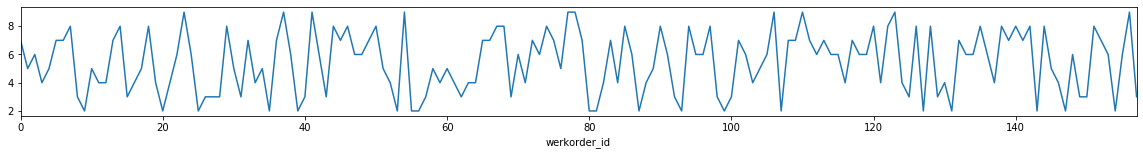

In [136]:
werkorder_df['werkorder_doorlooptijd'] = werkorder_df['werkorder_eind_datum']-werkorder_df['werkorder_start_datum']
# corrected to bypass Timestamps not being usefull in Power BI
werkorder_df['werkorder_doorlooptijd'] = werkorder_df['werkorder_doorlooptijd'].apply(lambda x: x.days)
werkorder_df['werkorder_maand_nummer'] = werkorder_df['werkorder_eind_datum'].apply(lambda x: x.isocalendar()[2])
werkorder_df['werkorder_doorlooptijd'].plot(figsize=(20,2))



print('\n\n\t\tWerkorder doorloop tijd\n')
#werkorder_df.drop(labels=['werkorder_doorlooptijd'], axis=1, inplace=True)

In [137]:
fig = px.line(werkorder_df.sort_values("werkorder_maand_nummer", ascending=False),  y="werkorder_doorlooptijd", color='werkorder_maand_nummer')
fig.show( )

In [138]:
fig = px.line(werkorder_df.sort_values("werkorder_doorlooptijd", ascending=False),  y="werkorder_doorlooptijd", color='werkorder_maand_nummer')
fig.show()

In [139]:
klant__verkoop_order_df = klant_df.join(verkoop_order_df.set_index('klant_id'), lsuffix='le_', rsuffix='re_')

if show_intermediate_results == True:    
    print(klant__verkoop_order_df.head(8))

          klant_id  achternaam voornaam geslacht      Woonplaats  \
klant_id                                                           
0                8  Luijn, van   Noëlle        V  Bergen op Zoom   
0                8  Luijn, van   Noëlle        V  Bergen op Zoom   
0                8  Luijn, van   Noëlle        V  Bergen op Zoom   
0                8  Luijn, van   Noëlle        V  Bergen op Zoom   
0                8  Luijn, van   Noëlle        V  Bergen op Zoom   
0                8  Luijn, van   Noëlle        V  Bergen op Zoom   
0                8  Luijn, van   Noëlle        V  Bergen op Zoom   
1               79   Oldenhuis   Feline        V         Stokkum   

         Gemeente|Naam  Gemeente|Code  Provincie|Naam verkoop_order_datum  \
klant_id                                                                    
0          BergenopZoom         GM0748  Noord-Brabant          2019-05-16   
0          BergenopZoom         GM0748  Noord-Brabant          2019-07-25   
0          

In [140]:
def save_dateframes(dataframes_list):
    
    for df in dataframes_list:
        try:
            globals()[df].to_csv(path_or_buf=str(df)+'.csv', sep='|')
            globals()[df].to_csv(path_or_buf=str(df)+'.tsv', sep='\t')
        except:
            print('Failed to save {} to TSV file.'.format(df))

save_dateframes(dataframes_list)